In [12]:
import threading
import time

lock = threading.Lock()   # Create a Lock to prevent mixed output from multiple threads

def print_num():
    for i in range(5):
        with lock:        # Acquire lock so only one thread prints at a time
            print(f"Numbers are : {i}")
        time.sleep(1)
def letters():
    for letter in "Shlok":
        with lock:        # Use lock to avoid print collision
            print(f"Letters are : {letter}")
        time.sleep(1)

start_time = time.perf_counter()  

t1 = threading.Thread(target=print_num)  #Creating Target Function
t2 = threading.Thread(target=letters)    #Creating Target Function

t1.start()                # Start execution of thread t1
t2.start()                # Start execution of thread t2

t1.join()                 # Main thread waits until t1 finishes execution
t2.join()                 # Main thread waits until t2 finishes execution

end_time = time.perf_counter()  

print(f"\nFinished in {end_time - start_time:.2f} seconds")

#In multithreading, print() without a Lock = messy output

Numbers are : 0
Letters are : S
Numbers are : 1
Letters are : h
Numbers are : 2
Letters are : l
Numbers are : 3
Letters are : o
Letters are : k
Numbers are : 4

Finished in 5.04 seconds


In [3]:
#-------MultiProcessing--------------------
# Processes that runs in parallel 
#CPU Bound tasks that are heavy on CPU usage (ex-Mathematical computation)
#Parallel Execution - Multiple cores on CPU
import multiprocessing
import time
def square():
    for i in range (5):
        time.sleep(1)
        print(f"Square of {i} is : {i*i}")

def cube():
    for i in range (5):
        time.sleep(1)
        print(f"Cube of {i} is : {i*i*i}")

if __name__=="__main__":
    #create 2 process
    p1 = multiprocessing.Process(target=square)
    p2 = multiprocessing.Process(target=cube)
    t=time.time()
    
    #Start process
    p1.start()
    p2.start()
    
    #Waiting for process to complete
    p1.join()
    p2.join()
    
    finished_time = time.time()-t
    print(finished_time) 
#We are not getting any output because Multiprocessing is designed for scripts, not notebooks.
#It works well with .py files in PyCharm

0.13599634170532227


In [1]:
#-----------Multithreading with Thread Pool Executor-----------------
from concurrent.futures import ThreadPoolExecutor
import time

def print_num(numbers):
    time.sleep(1)
    return(f"Number : {numbers}")

numbers=[1,2,3,4,5,6,7,8,9,0,1] # It is iterable

with ThreadPoolExecutor(max_workers=3) as executor:
    results = executor.map(print_num,numbers)    # executor.map(function, iterable)

for result in results:
    print(result)

#numbers can give its values one by one → that’s exactly what an iterable is.
#ThreadPoolExecutor - Manages a pool of threads.
#max_workers=3 - At most 3 threads run at the same time.
#executor.map - Even though threads finish unpredictably, map() preserves order.
# There are 5 tasks → [1,2,3,4,5]
# Only 3 threads can run at once
# Hence it will required only two seconds to run (not 5)
# BUT with a BIG difference:
# Built-in map()	   |     executor.map()
# Runs sequentially	   |   Runs concurrently
# Single thread	       |    Multiple threads

Number : 1
Number : 2
Number : 3
Number : 4
Number : 5
Number : 6
Number : 7
Number : 8
Number : 9
Number : 0
Number : 1


In [ ]:
#-----------Multithreading with Thread Pool Executor-----------------

# IN PYCHARM

# What happens when we run the file
# python demo.py
# Python automatically sets:
# if __name__ = "__main__"
# So the code inside the IF block runs.
# ✅ Processes are created
# ✅ Squares are calculated
# ✅ Output is printed



# What happens when new processes are created
# ProcessPoolExecutor creates new Python processes.
# Each new process:
# Starts Python again
# Re-runs this file from the top
# BUT now:
# __name__ = "demo"
# ❌ NOT "__main__"
# So this part does NOT run again:
# with ProcessPoolExecutor(...)
# Why this line is NECESSARY (VERY IMPORTANT)
# If you REMOVE it ❌
# with ProcessPoolExecutor(max_workers=3) as executor:
#     results = executor.map(sq, numbers)
# Then:
# Main process starts
# Creates new processes
# New process runs file again
# That process again creates new processes
# INFINITE loop 💥
# Program crashes / hangs


# This line prevents new processes from creating more processes again and again.
# Super short version (if you remember only one thing)
# ✔️ Needed for multiprocessing
# ✔️ NOT needed for threading
# ✔️ Prevents infinite process creation

In [ ]:
#--------------------------------Real Life Usecase for Multiprocessing----------------------------
#Multiprocessing for CPU bound tasks
#Factorial calculations
import multiprocessing  #For working on multiple task in a parallel time
import math  # FOr performing mathematical operation 
import time  # Measure Execution time
import sys   # Modify System Level Settings

#Increase the maximum number of digits for integer conversion
sys.set_int_max_str_digits(100000)
# Factorials of numbers like 5000 or 8000 produce extremely large integers.
# Python limits how many digits can be converted to a string (for safety).
# Printing factorials can exceed this limit.
# This line raises the allowed digit count, preventing errors like:
#ValueError: Exceeds the limit for integer string conversion


def compute_factorial(number):
    print(f"Computer Factorial of {number}")
    result=math.factorial(number)
    print(f"Factorial of {number} is : {result}")
    return result

if __name__=="__main__":
    numbers=[5000,6000,700,8000]
    #Each number represents one independent CPU-heavy task
    start_time = time.time()
# On Windows (and some systems), Python re-imports the script when creating child processes.
# Without this guard, the script would:
# Create infinite processes
# Crash your system 💥
# This ensures:
# a)The code runs only once in the main process
# b)Child processes only run the worker function
    

    with multiprocessing.Pool() as pool:
        results = pool.map(compute_factorial, numbers)
# A pool is a group of worker processes
# By default:
# Number of processes = number of CPU cores
# Example:
# 8-core CPU → 8 processes
# Using with ensures:
# Pool is properly closed
# Resources are released automatically
# 9️⃣ Parallel execution using map
# results = pool.map(compute_factorial, numbers)
# How map() works here:
# Similar to Python’s built-in map()
# But runs in parallel
# Internally:
# Each number is sent to a different process
# Each process calls compute_factorial(number)
# Equivalent (conceptually):
# compute_factorial(5000)
# compute_factorial(6000)
# compute_factorial(700)
# compute_factorial(8000)
# ➡️ Executed simultaneously on different CPU cores
# Output:
# results contains factorials in the same order as numbers
    end_time = time.time()

    print(f"Results : {results}")
    print(f"Time Taken : {end_time - start_time} seconds")

# CPU-bound task
# Factorial calculation uses pure CPU computation
# Python threads are limited by the GIL (Global Interpreter Lock)

In [1]:
import qrcode
import uuid

unique_id = str(uuid.uuid4())

qr_data = f"Unique QR ID: {unique_id}"

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data(qr_data)
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")

file_name = f"qr_{unique_id}.png"
img.save(file_name)

print("QR Code Generated")
print("Data ID:")
print(qr_data)
print(f"Saved as: {file_name}")


QR Code Generated
Data ID:
Unique QR ID: 8a771489-c950-4b87-8b1a-64cc5cd8324f
Saved as: qr_8a771489-c950-4b87-8b1a-64cc5cd8324f.png


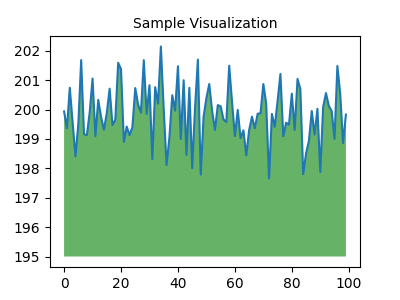

In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
#--------------MEMORY MANAGEMENT---------------------